# Multiconfigurational methods

## Strong/static correlation

As we can see from perturbation theory, the largest contributions to the correlation energy typically come from small denominators, that is from excitation from and to orbitals around the Fermi level. This suggest using a multi-scame approach to correlation, with an accurate method to describe correlation coming from a few orbitals located near the Fermi level and a cheaper but less accurate method for the rest.

In particular, in some situations, a few orbitals can have such large correlation effects that most electronic structure methods fail, sometimes dramatically. In those situations, the Hartree-Fock reference, upon which most other electronic structure methods are based, is not even qualitatively correct. One of the few methods able to describe such system is configuration interaction, which then shows several determinants with significant weights.

One simple example of this is what happens during homolytic bond dissociation.

In [1]:
import veloxchem as vlx
import multipsi as mtp
import numpy as np
import matplotlib.pyplot as plt

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 4.


In [2]:
#HF and CI calculation of OH. and H.
mol_str="""
O 0.0000 0.0000  0.0000
H 0.0000 0.8957 -0.3167
"""
molecule = vlx.Molecule.read_str(mol_str, units='angstrom')
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule,"STO-3G")
scfdrv = vlx.ScfUnrestrictedDriver()
scfdrv.compute(molecule, basis)
E_OH_hf=scfdrv.get_scf_energy()

space=mtp.MolSpace(molecule,scfdrv.mol_orbs)
space.FCI()
CIdrv=mtp.CIDriver(molecule,basis,space)
CIdrv.compute(1)
E_OH_FCI=CIdrv.getEnergy(0)


mol_str="H 0.0000 0.0000 0.0000"
molecule = vlx.Molecule.read_str(mol_str, units='angstrom')
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule,"STO-3G")
scfdrv = vlx.ScfUnrestrictedDriver()
scfdrv.compute(molecule, basis)
E_H_hf=scfdrv.get_scf_energy()

#HF and CI calculations of water with stretching of one O-H bond

mol_template = """
O 0.0000 0.0000  0.0000
H 0.0000 0.8957 -0.3167
H 0.0000 0.0000  OHdist
"""
scfdrv = vlx.ScfRestrictedDriver()
distlist=[0.7,0.8,0.9,0.95,1.1,1.3,1.5,1.7,2,2.5,3,4,5]
E_hf=[]
E_FCI=[]
NON=[]

#Scan over O-H distances
for dist in distlist:
    mol_str=mol_template.replace("OHdist", str(dist))
    molecule = vlx.Molecule.read_str(mol_str, units='angstrom')
    basis = vlx.MolecularBasis.read(molecule,"STO-3G")
    scfdrv.compute(molecule, basis)
    E_hf.append(scfdrv.get_scf_energy()-E_H_hf-E_OH_hf)
    
    space=mtp.MolSpace(molecule,scfdrv.mol_orbs)
    space.FCI()
    CIdrv=mtp.CIDriver(molecule,basis,space)
    CIdrv.compute(1)
    E_FCI.append(CIdrv.getEnergy(0)-E_H_hf-E_OH_FCI)
    NON.append(CIdrv.getNON(0)) #Get the natural occupation numbers

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Unrestricted Hartree-Fock                                       
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              6
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(9,6)

          CI expansion:
          -------------
Number of determinants:      90



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.38329623   0:00:00
Convergence reached in 1 iterations

        Final results
        -------------

* State 1
- Energy: -74.38329622937225
- S^2   : 0.75  (multiplicity = 2.0 )
- Natural orbitals
[2.00000 1.99932 1.99869 1.97455 1.00000 0.02745]
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                 

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.81979272   0:00:00
     2        -74.81983108   0:00:00
     3        -74.81983111   0:00:00
     4        -74.81983111   0:00:00
Convergence reached in 4 iterations

        Final results
        -------------

* State 1
- Energy: -74.81983111270208
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99854 1.99840 1.99225 1.97839 0.02329 0.00913]
[2.00000 1.99854 1.99840 1.99225 1.97839 0.02329 0.00913]
                                                                                                                          
                         


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.94261491   0:00:00
     2        -74.94264862   0:00:00
     3        -74.94264864   0:00:00
     4        -74.94264864   0:00:00
Convergence reached in 4 iterations

        Final results
        -------------

* State 1
- Energy: -74.94264864348743
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99842 1.99823 1.98805 1.97760 0.02406 0.01364]
[2.00000 1.99842 1.99823 1.98805 1.97760 0.02406 0.01364]
                                                                                                                          
                         


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.99594612   0:00:00
     2        -74.99597543   0:00:00
     3        -74.99597545   0:00:00
     4        -74.99597545   0:00:00
Convergence reached in 4 iterations

        Final results
        -------------

* State 1
- Energy: -74.99597545131303
- S^2   : -0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99832 1.99806 1.98169 1.97668 0.02480 0.02045]
[2.00000 1.99832 1.99806 1.98169 1.97668 0.02480 0.02045]
                                                                                                                          
                        


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -75.00709335   0:00:00
     2        -75.00712074   0:00:00
     3        -75.00712076   0:00:00
     4        -75.00712076   0:00:00
Convergence reached in 4 iterations

        Final results
        -------------

* State 1
- Energy: -75.00712076244656
- S^2   : -0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99828 1.99798 1.97810 1.97542 0.02562 0.02459]
[2.00000 1.99828 1.99798 1.97810 1.97542 0.02562 0.02459]
                                                                                                                          
                        


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -75.00597939   0:00:00
     2        -75.00600205   0:00:00
     3        -75.00600207   0:00:00
     4        -75.00600207   0:00:00
Convergence reached in 4 iterations

        Final results
        -------------

* State 1
- Energy: -75.00600206764864
- S^2   : -0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99819 1.99780 1.97589 1.95606 0.04613 0.02594]
[2.00000 1.99819 1.99780 1.97589 1.95606 0.04613 0.02594]
                                                                                                                          
                        


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.96948684   0:00:00
     2        -74.96950519   0:00:00
     3        -74.96950520   0:00:00
     4        -74.96950520   0:00:00
Convergence reached in 4 iterations

        Final results
        -------------

* State 1
- Energy: -74.969505200045
- S^2   : -0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99823 1.99772 1.97487 1.90309 0.09924 0.02685]
[2.00000 1.99823 1.99772 1.97487 1.90309 0.09924 0.02685]
                                                                                                                          
                          


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.92810378   0:00:00
     2        -74.92811962   0:00:00
     3        -74.92811963   0:00:00
     4        -74.92811963   0:00:00
Convergence reached in 4 iterations

        Final results
        -------------

* State 1
- Energy: -74.92811962715507
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99845 1.99785 1.97435 1.80815 0.19381 0.02739]
[2.00000 1.99845 1.99785 1.97435 1.80815 0.19381 0.02739]
                                                                                                                          
                         


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.89540965   0:00:00
     2        -74.89542405   0:00:00
     3        -74.89542406   0:00:00
Convergence reached in 3 iterations

        Final results
        -------------

* State 1
- Energy: -74.89542405645695
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99874 1.99809 1.97422 1.67075 0.33060 0.02759]
[2.00000 1.99874 1.99809 1.97422 1.67075 0.33060 0.02759]
                                                                                                                          
                                            Self Consistent Fi


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.86705702   0:00:00
     2        -74.86707042   0:00:00
     3        -74.86707042   0:00:00
Convergence reached in 3 iterations

        Final results
        -------------

* State 1
- Energy: -74.86707042367962
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99909 1.99843 1.97434 1.43906 0.56151 0.02757]
[2.00000 1.99909 1.99843 1.97434 1.43906 0.56151 0.02757]
                                                                                                                          
                                            Self Consistent Fi


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.85256070   0:00:00
     2        -74.85257368   0:00:00
     3        -74.85257369   0:00:00
Convergence reached in 3 iterations

        Final results
        -------------

* State 1
- Energy: -74.85257368662599
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99928 1.99865 1.97451 1.17266 0.82743 0.02747]
[2.00000 1.99928 1.99865 1.97451 1.17266 0.82743 0.02747]
                                                                                                                          
                                            Self Consistent Fi


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.85021433   0:00:00
     2        -74.85022726   0:00:00
     3        -74.85022726   0:00:00
Convergence reached in 3 iterations

        Final results
        -------------

* State 1
- Energy: -74.85022726272351
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99931 1.99869 1.97454 1.05946 0.94055 0.02745]
[2.00000 1.99931 1.99869 1.97454 1.05946 0.94055 0.02745]
                                                                                                                          
                                            Self Consistent Fi

                 20       -74.149171198321   -0.0322773470      0.42354770      0.11489359      0.09178280                
                 21       -74.142418357227    0.0067528411      0.46033756      0.12512725      0.02187277                
                 22       -74.062607030152    0.0798113271      0.72621346      0.19569784      1.41987585                
                 23       -74.084034449456   -0.0214274193      0.65055732      0.17594837      0.04513370                
                 24       -74.126690898964   -0.0426564495      0.53577354      0.14632961      1.41982556                
                 25       -74.138983262787   -0.0122923638      0.47804686      0.13023496      0.03473344                
                 26       -73.980729803132    0.1582534597      0.95239477      0.25471234      1.44123942                
                 27       -73.984925756869   -0.0041959537      0.94278313      0.25225977      0.29403377                
                

* Info * SAD initial guess computed in 0.00 sec.                                                                          
                                                                                                                          
* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -73.928853308445 a.u. Time: 0.06 sec.                                  
                                                                                                                          
* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                

               *** Warning: SCF is not converged!                                                                         
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              7
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(10,7)

          CI expansion:
          -------------
Number of determinants:      231



        CI Iterations
        -------------

Iteration   Average energy      Time
     1        -74.84986516   0:00:00
     2        -74.84987808   0:00:00
     3        -74.84987809   0:00:00
Convergence reached in 3 iterations

        Final results
        -------------

* State 1
- Energy: -74.849878085651
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[2.00000 1.99932 1.99869 1.97455 1.00019 0.99981 0.02745]

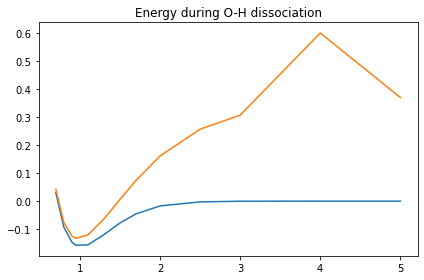

In [3]:
plt.figure(figsize=(6,4))
plt.title('Energy during O-H dissociation')
x = np.array(distlist)
y = np.array(E_FCI)
z = np.array(E_hf)
plt.plot(x,y)
plt.plot(x,z)
plt.tight_layout(); plt.show()

It is clear that while HF gives a reasonable energy around the equilibrium, it performs very poorly at longer O-H distances, failing to reach the sum of the energies of the two fragments OH$^.$ and H$^.$). The SCF convergence is also very poor and can in some cases even fail.

The explanation can be found by looking at the occupation numbers of the CI, which shows that two orbitals are getting increasingly correlated. If we would plot them, we would see they correspond to the $\sigma$ and $\sigma^*$ orbitals.

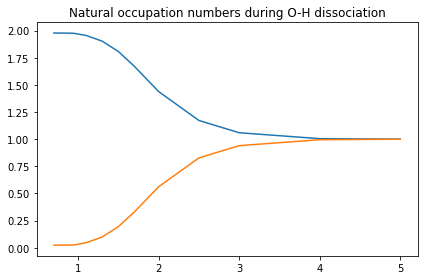

In [5]:
plt.figure(figsize=(6,4))
plt.title('Natural occupation numbers during O-H dissociation')
x = np.array(distlist)
sigma=[]
sigma_star=[]
for NONi in NON:
    sigma.append(NONi[4])
    sigma_star.append(NONi[5])
y = np.array(sigma)
z = np.array(sigma_star)
plt.plot(x,y)
plt.plot(x,z)
plt.tight_layout(); plt.show()

Clearly, at longer distances, the Hartree-Fock approximation of doubly occupied $\sigma$ and empty $\sigma^*$ becomes less and less reasonable.

On the other hand, even at long O-H distances, all occupation number remain reasonably close to the HF assumption, suggesting that we only needed to perform the CI over these two orbitals.

In [7]:
print("Natural orbital occupation numbers at 5Å")
print(NON[-1])

Natural orbital occupation numbers at 5Å
[2.00000 1.99932 1.99869 1.97455 1.00019 0.99981 0.02745]


Doing so would define an "active space" containing the two orbitals, while the other orbitals would be called "inactive". Including all excitations within this active space, that performing a full CI within this small space, we define a so-called "complete active space" (CAS), and the method is thus called CASCI.

TODO : add non-bond breaking strong correlation?

## The Multiconfigurational Self-Consistent Field method (MCSCF)

While the CASCI can be performed after a Hartree-Fock calculation, it has a major flaw in that the orbitals were optimized assuming the Hartree-Fock density was reasonable. But the main motivation behind CASCI was precisely that the Hartree-Fock density was wrong, and thus the Hartree-Fock orbitals are far from optimal. It is thus tempting to want to optimize the orbitals using the CASCI density. Of course, as the orbitals change, it is likely the CASCI would also need to be relaxed. Clearly, the process need to be self-consistent. The resulting method is called the multiconfigurational self-consistent field method (MCSCF), and if we used a complete active space, it can be called more specifically CASSCF.

MCSCF can be seen as a generalization of the self-consistent field concept of Hartree-Fock to a wavefunction containing several determinants. It simultaneously relaxes the orbitals and the CI coefficients.

### Illustrative example
Let us illustrate the MCSCF method by applying it to our O-H dissociation problem. As we mentioned, an active space containing the $\sigma$ and $\sigma^*$ is enough to qualitatively describe the bond-breaking. The simplest way to define this active space in the program is to mention the number of active orbitals (here 2) as well as the number of electrons in them (here also 2). We often use the notation CAS($m,n$) with $m$ the number of electrons and $n$ the number of orbitals.

In [10]:
E_CASSCF=[]
NON=[]

#Scan over O-H distances
for dist in distlist:
    mol_str=mol_template.replace("OHdist", str(dist))
    molecule = vlx.Molecule.read_str(mol_str, units='angstrom')
    basis = vlx.MolecularBasis.read(molecule,"STO-3G")
    scfdrv.compute(molecule, basis)
    
    space=mtp.MolSpace(molecule,scfdrv.mol_orbs)
    space.CAS(2,2)
    Mcscfdrv=mtp.McscfDriver(molecule,basis,space)
    Mcscfdrv.compute(1)
    E_CASSCF.append(Mcscfdrv.getEnergy(0)-E_H_hf-E_OH_hf)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.78521352     0.0e+00         1    0:00:00
     2    -74.78536761    -1.5e-04         1    0:00:00
     3    -74.78544373    -7.6e-05         1    0:00:00
     4    -74.78548600    -4.2e-05         1    0:00:00
     5    -74.78548957    -3.6e-06         1    0:00:00
     6    -74.78548965    -8.2e-08         1    0:00:00
     7    -74.78548968    -2.5e-08         1    0:00:00
     8    -74.78548968    -5.5e-09         1    0:00:00
Convergence reached in 8 iterations

        Final results
        -------------

* State 1
- Energy: -74.78548968213742



          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.90395720     0.0e+00         1    0:00:00
     2    -74.90406041    -1.0e-04         1    0:00:00
     3    -74.90410958    -4.9e-05         1    0:00:00
     4    -74.90413613    -2.7e-05         1    0:00:00
     5    -74.90413636    -2.2e-07         1    0:00:00
     6    -74.90413636    -5.3e-09         1    0:00:00
Convergence reached in 6 iterations

        Final results
        -------------

* State 1
- Energy: -74.90413636448156
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[1.99811 0.00189]

Total MCSCF time: 00:00:00
         


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.95234895     0.0e+00         1    0:00:00
     2    -74.95237335    -2.4e-05         1    0:00:00
     3    -74.95235367     2.0e-05         1    0:00:00
     4    -74.95214252     2.1e-04         1    0:00:00
     5    -74.95238532    -2.4e-04         1    0:00:00
     6    -74.95238610    -7.8e-07         1    0:00:00
     7    -74.95238638    -2.8e-07         1    0:00:00
     8    -74.95238638    -1.9e-09         1    0:00:00
     9    -74.95238638    -3.0e-09         1    0:00:00
Convergence reached in 9 iterations

        Final results
      


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.96056929     0.0e+00         1    0:00:00
     2    -74.96057444    -5.1e-06         1    0:00:00
     3    -74.96057296     1.5e-06         1    0:00:00
     4    -74.96057455    -1.6e-06         1    0:00:00
     5    -74.96057473    -1.8e-07         1    0:00:00
     6    -74.96057475    -2.0e-08         1    0:00:00
     7    -74.96057475    -5.2e-09         1    0:00:00
Convergence reached in 7 iterations

        Final results
        -------------

* State 1
- Energy: -74.96057475384842
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.94838914     0.0e+00         1    0:00:00
     2    -74.94845665    -6.8e-05         1    0:00:00
     3    -74.94849733    -4.1e-05         1    0:00:00
     4    -74.94769576     8.0e-04         1    0:00:00
     5    -74.94848406    -7.9e-04         1    0:00:00
     6    -74.94852415    -4.0e-05         1    0:00:00
     7    -74.94852685    -2.7e-06         1    0:00:00
     8    -74.94709261     1.4e-03         1    0:00:00
     9    -74.94852404    -1.4e-03         1    0:00:00
    10    -74.94852690    -2.9e-06         1    0:00:00
    11   


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.89139644     0.0e+00         1    0:00:00
     2    -74.89145875    -6.2e-05         1    0:00:00
     3    -74.89150480    -4.6e-05         1    0:00:00
     4    -74.89153188    -2.7e-05         1    0:00:00
     5    -74.89158351    -5.2e-05         1    0:00:00
     6    -74.89158365    -1.3e-07         1    0:00:00
     7    -74.89158366    -1.6e-08         1    0:00:00
Convergence reached in 7 iterations

        Final results
        -------------

* State 1
- Energy: -74.89158366276436
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.88252747     0.0e+00         1    0:00:00
     2    -74.89727155    -1.5e-02         1    0:00:00
     3    -74.89922711    -2.0e-03         1    0:00:00
     4    -74.89918363     4.3e-05         1    0:00:00
     5    -74.89942565    -2.4e-04         1    0:00:00
     6    -74.89943420    -8.6e-06         1    0:00:00
     7    -74.89943516    -9.6e-07         1    0:00:00
     8    -74.89943539    -2.3e-07         1    0:00:00
     9    -74.89943543    -4.1e-08         1    0:00:00
Convergence reached in 9 iterations

        Final results
      


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.85833041     0.0e+00         1    0:00:00
     2    -74.86724131    -8.9e-03         1    0:00:00
     3    -74.86791776    -6.8e-04         1    0:00:00
     4    -74.86794571    -2.8e-05         1    0:00:00
     5    -74.86796047    -1.5e-05         1    0:00:00
     6    -74.86796203    -1.6e-06         1    0:00:00
     7    -74.86796243    -4.0e-07         1    0:00:00
     8    -74.86796245    -2.6e-08         1    0:00:00
Convergence reached in 8 iterations

        Final results
        -------------

* State 1
- Energy: -74.86796245091037



          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.83706010     0.0e+00         1    0:00:00
     2    -74.84110168    -4.0e-03         1    0:00:00
     3    -74.84129073    -1.9e-04         1    0:00:00
     4    -74.84130974    -1.9e-05         1    0:00:00
     5    -74.84131859    -8.8e-06         1    0:00:00
     6    -74.84132038    -1.8e-06         1    0:00:00
     7    -74.84132053    -1.5e-07         1    0:00:00
     8    -74.84132053    -6.6e-09         1    0:00:00
Convergence reached in 8 iterations

        Final results
        -------------

* State 1
- Energy: -74.84132053239236



          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.82678908     0.0e+00         1    0:00:00
     2    -74.82788251    -1.1e-03         1    0:00:00
     3    -74.82793844    -5.6e-05         1    0:00:00
     4    -74.82797106    -3.3e-05         1    0:00:00
     5    -74.82797906    -8.0e-06         1    0:00:00
     6    -74.82798022    -1.2e-06         1    0:00:00
     7    -74.82798026    -3.9e-08         1    0:00:00
Convergence reached in 7 iterations

        Final results
        -------------

* State 1
- Energy: -74.82798026163422
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.82547617     0.0e+00         1    0:00:00
     2    -74.82580783    -3.3e-04         1    0:00:00
     3    -74.82582183    -1.4e-05         1    0:00:00
     4    -74.82583405    -1.2e-05         1    0:00:00
     5    -74.82583525    -1.2e-06         1    0:00:00
     6    -74.82583539    -1.4e-07         1    0:00:00
Convergence reached in 6 iterations

        Final results
        -------------

* State 1
- Energy: -74.82583538815753
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[1.05669 0.94331]

Total MCSCF time: 00:00:00
         

                 19       -74.116893785089    0.0028257398      0.57720142      0.15794979      0.00736227                
                 20       -74.149171090256   -0.0322773052      0.42354832      0.11489376      0.09178259                
                 21       -74.142418160331    0.0067529299      0.46033859      0.12512754      0.02187301                
                 22       -74.062607121804    0.0798110385      0.72621315      0.19569776      1.41987589                
                 23       -74.084034538043   -0.0214274162      0.65055699      0.17594829      0.04513369                
                 24       -74.126690812182   -0.0426562741      0.53577392      0.14632972      1.41982557                
                 25       -74.138981366049   -0.0122905539      0.47805636      0.13023761      0.03472796                
                 26       -73.980725063235    0.1582563028      0.95240473      0.25471496      1.44124182                
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * SAD initial guess computed in 0.00 sec.                                                                          
                                                                                                                          
* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -73.928853308445 a.u. Time: 0.05 sec.                                  
                                                                                                                          
* Info * Overlap matrix computed in 0.00 sec.                                                                             
                

                 50       -74.463524637065    0.0008420521      0.06263351      0.01388152      0.05536366                
                                                                                                                          
               *** SCF NOT converged in 50 iterations. Time: 0.56 sec.                                                    
                                                                                                                          
               *** Warning: SCF is not converged!                                                                         
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expans

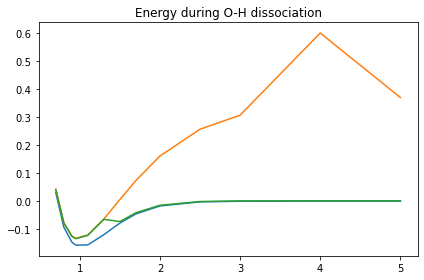

In [11]:
plt.figure(figsize=(6,4))
plt.title('Energy during O-H dissociation')
x = np.array(distlist)
y = np.array(E_FCI)
z = np.array(E_hf)
zz = np.array(E_CASSCF)
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,zz)
plt.tight_layout(); plt.show()

The result looks a bit disappointing. On one side, the SCF converges without major issue (unlike Hartree-Fock) and indeed approaches the FCI result at long distances. However, at short distances it did no better than HF, resulting in a weird transition between the two zones.

This highlights one of the main difficulties in MCSCF. It is not enough to provide the number of active orbitals, it is essential to provide the right ones. By default, our CAS(2,2) including the HOMO and LUMO, but at short distances, the HOMO is an oxygen lone pair, not the $\sigma$. We can fix this by explicitely requesting the HOMO-1 in these cases

In [12]:
idx=0
for dist in [0.7,0.8,0.9,0.95,1.1,1.3]: #Short distances
    mol_str=mol_template.replace("OHdist", str(dist))
    molecule = vlx.Molecule.read_str(mol_str, units='angstrom')
    basis = vlx.MolecularBasis.read(molecule,"STO-3G")
    scfdrv.compute(molecule, basis)
    
    space=mtp.MolSpace(molecule,scfdrv.mol_orbs)
    space.CASOrb([3,5])
    Mcscfdrv=mtp.McscfDriver(molecule,basis,space)
    Mcscfdrv.compute(1)
    E_CASSCF[idx]=Mcscfdrv.getEnergy(0)-E_H_hf-E_OH_hf
    idx+=1

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.78647454     0.0e+00         1    0:00:00
     2    -74.79695429    -1.0e-02         1    0:00:00
     3    -74.80225120    -5.3e-03         1    0:00:00
     4    -74.80297430    -7.2e-04         1    0:00:00
     5    -74.80312914    -1.5e-04         1    0:00:00
     6    -74.80315320    -2.4e-05         1    0:00:00
     7    -74.80315633    -3.1e-06         1    0:00:00
     8    -74.80315737    -1.0e-06         1    0:00:00
     9    -74.80315864    -1.3e-06         1    0:00:00
    10    -74.80315888    -2.4e-07         1    0:00:00
    11   


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.90523906     0.0e+00         1    0:00:00
     2    -74.91529848    -1.0e-02         1    0:00:00
     3    -74.92023671    -4.9e-03         1    0:00:00
     4    -74.92150005    -1.3e-03         1    0:00:00
     5    -74.92188709    -3.9e-04         1    0:00:00
     6    -74.92197189    -8.5e-05         1    0:00:00
     7    -74.92188280     8.9e-05         1    0:00:00
     8    -74.92199689    -1.1e-04         1    0:00:00
     9    -74.92202333    -2.6e-05         1    0:00:00
    10    -74.92202459    -1.3e-06         1    0:00:00
    11   


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.95367430     0.0e+00         1    0:00:00
     2    -74.96122372    -7.5e-03         1    0:00:00
     3    -74.96395523    -2.7e-03         1    0:00:00
     4    -74.96582120    -1.9e-03         1    0:00:00
     5    -74.96837066    -2.5e-03         1    0:00:00
     6    -74.96958938    -1.2e-03         1    0:00:00
     7    -74.96999902    -4.1e-04         1    0:00:00
     8    -74.97033938    -3.4e-04         1    0:00:00
     9    -74.97039715    -5.8e-05         1    0:00:00
    10    -74.95859340     1.2e-02         1    0:00:00
    11   


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.96221791     0.0e+00         1    0:00:00
     2    -74.96894438    -6.7e-03         1    0:00:00
     3    -74.96985988    -9.2e-04         1    0:00:00
     4    -74.96995385    -9.4e-05         1    0:00:00
     5    -74.96995491    -1.1e-06         1    0:00:00
     6    -74.96995496    -5.4e-08         1    0:00:00
     7    -74.96995505    -8.7e-08         1    0:00:00
     8    -74.96995542    -3.7e-07         1    0:00:00
     9    -74.96995633    -9.1e-07         1    0:00:00
    10    -74.96995978    -3.5e-06         1    0:00:00
    11   

               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -74.9472509827 a.u.                                              
               Electronic Energy                  :      -83.5675696441 a.u.                                              
               Nuclear Repulsion Energy           :        8.6203186615 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000001106 a.u.                                              
                                                                                                                          
                

    13    -74.97689940    -1.8e-08         1    0:00:00
Convergence reached in 13 iterations

        Final results
        -------------

* State 1
- Energy: -74.97689939841975
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
[1.95549 0.04451]

Total MCSCF time: 00:00:00
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace   


          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 4
Number of active orbitals:              2
Number of virtual orbitals:             1

    This is a CASSCF wavefunction: CAS(2,2)

          CI expansion:
          -------------
Number of determinants:      3



        MCSCF Iterations
        ----------------

  Iter.     Avg. energy   E. change   CI iter     Time
     1    -74.91547972     0.0e+00         1    0:00:00
     2    -74.93529254    -2.0e-02         1    0:00:00
     3    -74.93420287     1.1e-03         1    0:00:00
     4    -74.93929442    -5.1e-03         1    0:00:00
     5    -74.94009893    -8.0e-04         1    0:00:00
     6    -74.94015302    -5.4e-05         1    0:00:00
     7    -74.94016252    -9.5e-06         1    0:00:00
     8    -74.94016403    -1.5e-06         1    0:00:00
     9    -74.94016419    -1.6e-07         1    0:00:00
    10    -74.94016421    -1.5e-08         1    0:00:00
Convergen

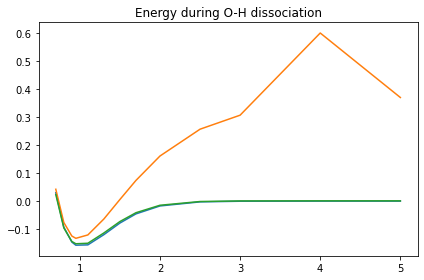

In [13]:
plt.figure(figsize=(6,4))
plt.title('Energy during O-H dissociation')
x = np.array(distlist)
y = np.array(E_FCI)
z = np.array(E_hf)
zz = np.array(E_CASSCF)
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,zz)
plt.tight_layout(); plt.show()

We now have a smooth curve that is nearly as good (in this minimal basis case where correlation outside of the active space is limited) as the full CI.

Note that this process can be made easier by reusing the orbitals of the previous point as guess for the following point. This way, it is enough to find the right orbitals for the first point, and hopefully, the active space will be stable over the entire scan (similarly for optimization or dynamics). In any case, it is always a good idea to check that the final orbitals (after convergence) are the ones you want.

### Theory

The MCSCF wavefunction contains both CI and orbital parameters and can be written as

\begin{equation}
| \Psi_{MCSCF} \rangle = e^{-\hat{\kappa}} (\sum_I c_I | \mathbf{I} \rangle)
\end{equation}

with $\hat{\kappa}$ the orbital rotation operator

\begin{equation}
\hat{\kappa} = \sum_{p<q} \kappa_{pq} (\hat{E}_{pq} - \hat{E}_{qp})
\end{equation}

It is often simpler to treat the optimization as two separate problems, an optimization of the CI coefficient followed by an optimization of the orbitals. Doing so means neglecting the coupling between the two occuring in the Hessian ($\frac{\partial^2 E}{\partial c_I \partial \kappa_{pq}}$), and the method is thus "first order".

The CI optimization can be done following the standard CI techniques seen in a previous chapter. However, the orbital optimization needs more inspection. The general expression of the orbital derivative is:

\begin{equation}
\frac{\partial E}{\partial \kappa_{pq}} = 2 (F_{pq} - F_{qp})
\end{equation}

with
\begin{equation}
F_{pq} = \sum_r D_{pr} h_{rq} + 2\sum_{rst} \Gamma_{prst}(rq|st)
\end{equation}

with $D$ and $\Gamma$ the one and two-particle density matrices.
For a Hartree-Fock wavefunction, the one-particle density is diagonal with an occupation number of 2 for all occupied orbitals and $\Gamma_{pqrs} = D_{pq}D_{rs} - \frac{1}{2} D_{pr}D_{qs}$ , and the equation then simplifies to the usual Fock matrix:

\begin{equation}
F_{pq}^{\mathrm{HF}} = 2h_{pq} + 2\sum_{s} 2(pq|ss) - (ps|qs)
\end{equation}

The MCSCF matrix is more complicated, and we can see two cases depending on if $p$ is inactive or active:

\begin{equation}
F_{iq} = 2h_{iq} + 2\sum_j 2(iq|jj) - (ij|qj) + \sum_tu D_{tu} [2 (iq|tu) − (it|qu)]
\end{equation}
and
\begin{equation}
F_{tq} = \sum_u D_{tu} [h_{uq} + \sum_j 2(uq|jj) - (uj|qj)] + 2\sum_{uvw} \Gamma_{tuvw}(uq|vw)
\end{equation}

where we have used the indices $i, j$ for inactive orbitals, $t,u, v, w$ for active and $a,b$ for virtual. The matrices $D_{tu}$ and $\Gamma_{tuvw}$ are the active one and two-particle density matrices computed by the CI code.

By defining the inactive Fock matrix $F^\mathrm{I}_{pq} = h_{pq} + \sum_j 2(pq|jj) - (pj|qj)$, we can simply these expressions somewhat

\begin{equation}
F_{iq} = 2F^\mathrm{I}_{iq} + \sum_{tu} D_{tu} [2 (iq|tu) − (it|qu)]
\end{equation}
and
\begin{equation}
F_{tq} = \sum_u D_{tu} F^\mathrm{I}_{uq} + 2\sum_{uvw} \Gamma_{tuvw}(uq|vw)
\end{equation}

Since this matrix are analogous to the HF Fock matrix, it is usually called the effective Fock matrix.

In HF, the Fock matrix is diagonalized, and it is easy to see how doing so indeed sets the gradient $2(F_{pq}-F_{qp})$ to 0.